# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [73]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [74]:
# YOUR CODE HERE
titanic_df = pd.read_csv('ML_Titanic_dataset.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [76]:
titanic_df.shape
titanic_df.dtypes
titanic_df.describe()
titanic_df.info()
titanic_df.isnull()
titanic_df.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/vp/ynvw_5l50czfjyr3gfjrkl6m0000gn/T/ipykernel_20280/287791778.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  titanic_df.sum()


PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                     21205.17
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  28693.9493
dtype: object

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [77]:
# YOUR CODE HERE
#titanic_df.drop(['Cabin'],inplace = True)

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [78]:
# YOUR CODE HERE
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame(name="count")
pclass_df.head()

,count
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<AxesSubplot:xlabel='Pclass'>

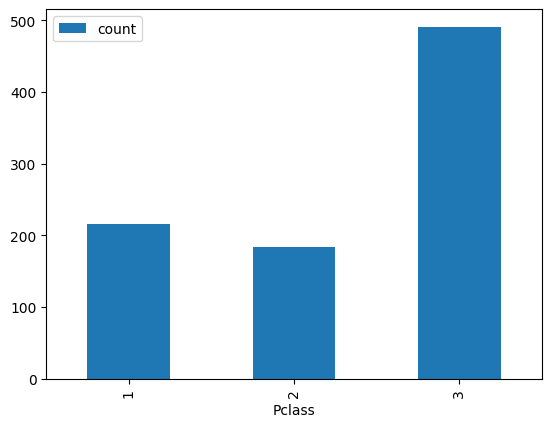

In [79]:
# YOUR CODE HERE
pclass_df.plot(kind='bar')

In [41]:
Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

SyntaxError: unterminated string literal (detected at line 1) (863003194.py, line 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


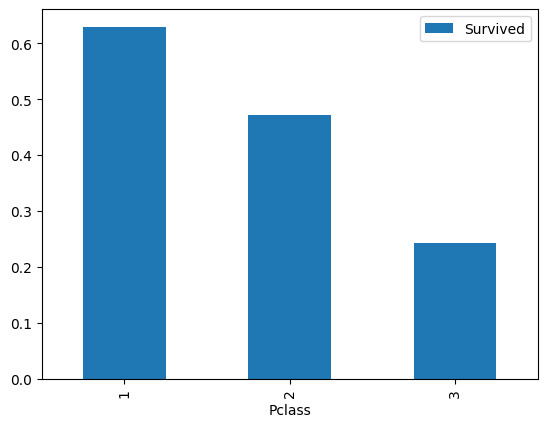

In [80]:
# YOUR CODE HERE
titanic_df[["Pclass","Survived"]].groupby("Pclass").mean().plot(kind="bar")
titanic_df.head()

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [81]:
# YOUR CODE HERE
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<AxesSubplot:xlabel='Sex'>

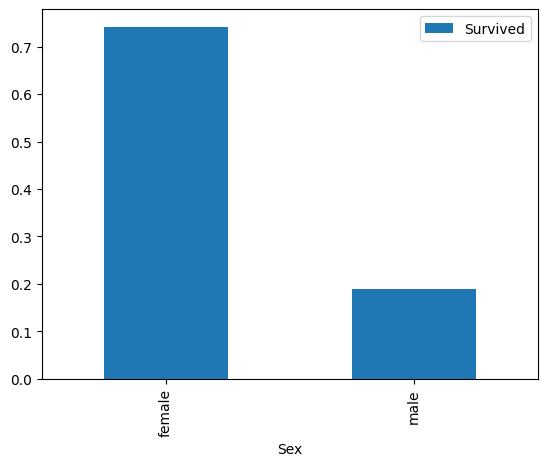

In [82]:
# YOUR CODE HERE
titanic_df[["Survived","Sex"]].groupby("Sex").mean().plot(kind="bar")

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

<AxesSubplot:xlabel='Sex'>

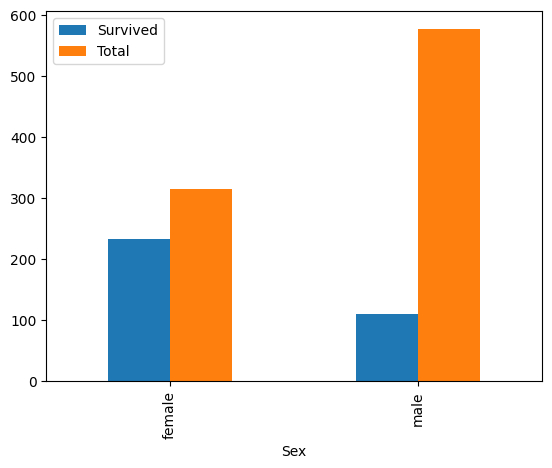

In [83]:
# YOUR CODE HERE
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.head()
survivors_df.plot(kind='bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [84]:
# YOUR CODE HERE
children_df = titanic_df[titanic_df["Age"]<18]
children_df.shape

(113, 12)

❓ How many children were there in the Titanic?

In [85]:
# YOUR CODE HERE
children_df[["Survived"]].count()

Survived    113
dtype: int64

❓ How many children survived?

In [86]:
# YOUR CODE HERE
children_df["Survived"].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [93]:
# YOUR CODE HERE
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [100]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [ 0, 0 ]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


<AxesSubplot:xlabel='Sex'>

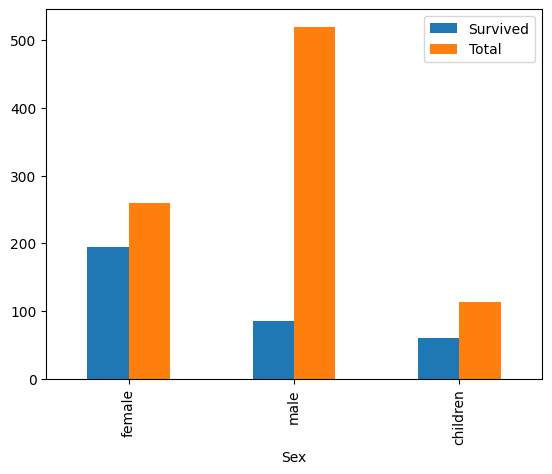

In [101]:
(survivors_df - children_gender_df).plot(kind='bar')

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [88]:
# YOUR CODE HERE

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [89]:
# YOUR CODE HERE